In [3]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [4]:
proj=gpd.read_file('../shp/combi.shp')

In [5]:
proj.head()

,id,geometry
0,1,"POLYGON ((-10423170.940 5164494.710, -10425171..."


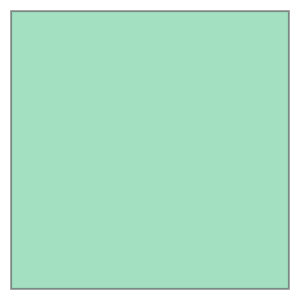

In [6]:
proj.loc[0,'geometry']

In [ ]:
import raterio

In [5]:
from shapely.geometry import Polygon
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]

polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))

grid = gpd.GeoDataFrame([polygon], columns=["geometry"])
grid.set_crs(epsg=4326, inplace=True)

,geometry
0,"POLYGON ((-93.75616 41.91801, -93.75616 41.921..."


<AxesSubplot:>

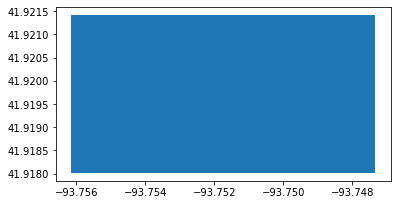

In [6]:
grid.plot()

In [8]:
grid.bounds

,minx,miny,maxx,maxy
0,-93.756155,41.918015,-93.747334,41.921429


In [9]:
proj.bounds

,minx,miny,maxx,maxy
0,-10425171.94,5164494.71,-10423170.94,5166495.71


<AxesSubplot:>

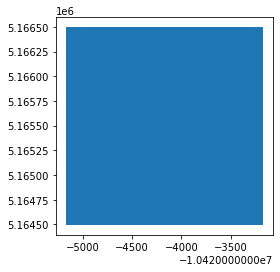

In [11]:
proj.plot()

In [7]:
import pandas as pd
import geopandas as gpd



In [8]:
data=pd.read_csv('../geojson/iowa.csv')

In [9]:
data

,Classification,EdgeOfFlightLine,GpsTime,Intensity,NumberOfReturns,OriginId,PointSourceId,ReturnNumber,ScanAngleRank,ScanDirectionFlag,UserData,X,Y,Z
0,2.0,0.0,55109.205,147.0,1.0,17583.0,79.0,1.0,1.0,1.0,70.0,-10423327.04,5165424.45,272.51
1,2.0,0.0,55109.219,170.0,1.0,17583.0,79.0,1.0,1.0,0.0,70.0,-10423331.98,5165424.45,272.44
2,2.0,0.0,55109.232,136.0,1.0,17583.0,79.0,1.0,1.0,1.0,70.0,-10423338.73,5165424.50,272.36
3,2.0,0.0,55109.232,146.0,1.0,17583.0,79.0,1.0,1.0,1.0,70.0,-10423336.27,5165424.97,272.39
4,2.0,0.0,55109.232,99.0,1.0,17583.0,79.0,1.0,1.0,1.0,70.0,-10423328.95,5165426.42,272.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436153,2.0,0.0,56179.469,36.0,2.0,17583.0,85.0,2.0,-9.0,0.0,69.0,-10424341.58,5164498.82,285.15
1436154,2.0,0.0,56179.469,9.0,2.0,17583.0,85.0,2.0,-10.0,0.0,69.0,-10424313.93,5164494.79,283.54
1436155,2.0,0.0,56179.507,89.0,1.0,17583.0,85.0,1.0,-8.0,1.0,69.0,-10424368.48,5164499.68,285.53
1436156,2.0,0.0,56179.524,71.0,1.0,17583.0,85.0,1.0,-8.0,0.0,69.0,-10424375.46,5164499.07,285.40


In [11]:
geoDF=data[['X','Y','Z']]

In [12]:
geoDF

,X,Y,Z
0,-10423327.04,5165424.45,272.51
1,-10423331.98,5165424.45,272.44
2,-10423338.73,5165424.50,272.36
3,-10423336.27,5165424.97,272.39
4,-10423328.95,5165426.42,272.48
...,...,...,...
1436153,-10424341.58,5164498.82,285.15
1436154,-10424313.93,5164494.79,283.54
1436155,-10424368.48,5164499.68,285.53
1436156,-10424375.46,5164499.07,285.40


In [15]:
from shapely.geometry import Point

geometry=[Point(xy)for xy in zip(pd.to_numeric(geoDF['X']),pd.to_numeric(geoDF['Y']))]
geoDF=gpd.GeoDataFrame(geoDF,crs='epsg:4326',geometry=geometry)
geoDF
                                 

,X,Y,Z,geometry
0,-10423327.04,5165424.45,272.51,POINT (-10423327.040 5165424.450)
1,-10423331.98,5165424.45,272.44,POINT (-10423331.980 5165424.450)
2,-10423338.73,5165424.50,272.36,POINT (-10423338.730 5165424.500)
3,-10423336.27,5165424.97,272.39,POINT (-10423336.270 5165424.970)
4,-10423328.95,5165426.42,272.48,POINT (-10423328.950 5165426.420)
...,...,...,...,...
1436153,-10424341.58,5164498.82,285.15,POINT (-10424341.580 5164498.820)
1436154,-10424313.93,5164494.79,283.54,POINT (-10424313.930 5164494.790)
1436155,-10424368.48,5164499.68,285.53,POINT (-10424368.480 5164499.680)
1436156,-10424375.46,5164499.07,285.40,POINT (-10424375.460 5164499.070)


In [16]:
geoDF.to_csv('../geodataf/geodata.csv')

<AxesSubplot:>

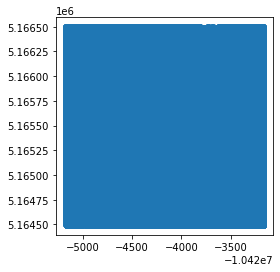

In [25]:
geoDF.plot(aspect=1)

<AxesSubplot:>

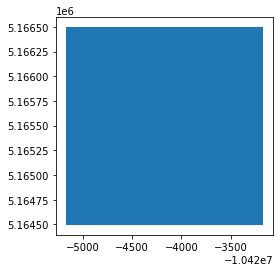

In [18]:
kings_county_map = gpd.read_file('../shp/combi.shp')
kings_county_map.plot()

<AxesSubplot:>

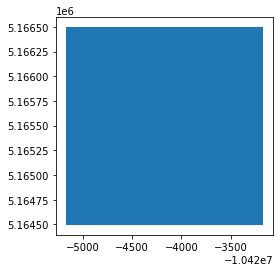

In [24]:
kings_county_map.set_crs(epsg=4326).plot(aspect=1)

<AxesSubplot:>

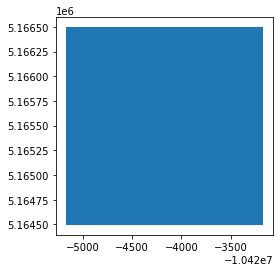

In [22]:
kings_county_map.plot()

Text(0.5, 1.0, 'Kings County Real Estate')

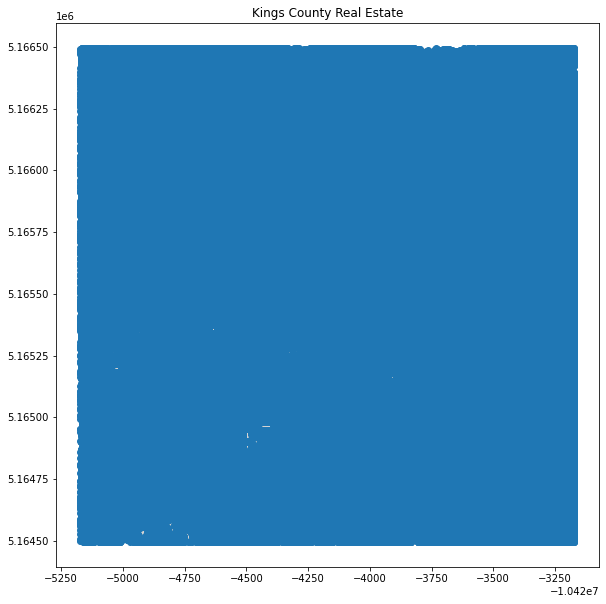

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))
kings_county_map.set_crs(epsg=4326).plot(ax=ax, color='lightgrey',aspect=1)
geoDF.plot(ax=ax,aspect=1)
ax.set_title('Data Points in the Iowa Area')

Text(0.5, 1.0, 'Data Points in the Iowa Area')

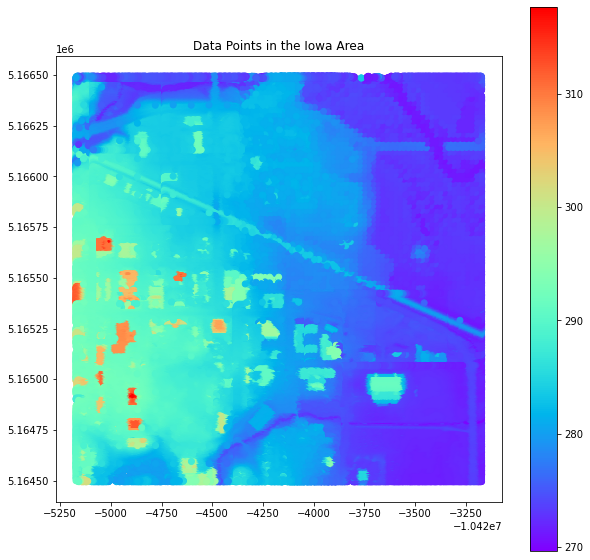

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))
kings_county_map.set_crs(epsg=4326).plot(ax=ax, color='lightgrey',aspect=1)
geoDF.plot(ax=ax,aspect=1,column='Z',cmap='rainbow',legend = True)
ax.set_title('Data Points in the Iowa Area')

In [33]:
from shapely.geometry import Polygon

MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))

grid = gpd.GeoDataFrame([polygon], columns=["geometry"])
grid.set_crs(epsg=4326, inplace=True)

,geometry
0,"POLYGON ((-93.75616 41.91801, -93.75616 41.921..."


<AxesSubplot:>

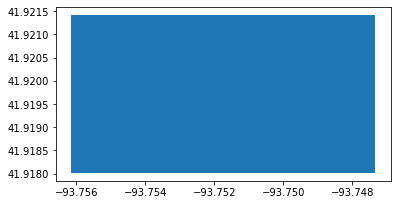

In [31]:
grid.plot()

Text(0.5, 1.0, 'Data Points in the Iowa Area')

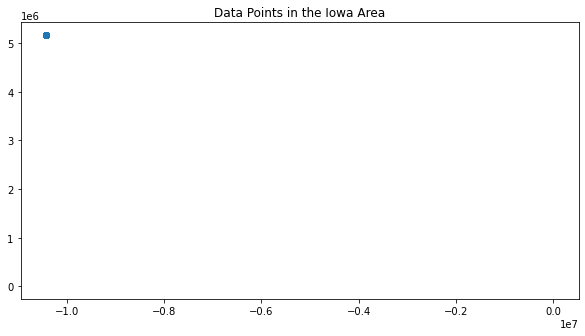

In [ ]:

fig, ax = plt.subplots(figsize = (10,10))
grid.set_crs(epsg=4326).plot(ax=ax, color='lightgrey',aspect=1)
geoDF.plot(ax=ax,aspect=1)
ax.set_title('Data Points in the Iowa Area')